In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import os
import sys
import random

import antares_client
# set random seed for consistent results
import random
random.seed(0)

plt.style.use('fig_publication.mplstyle')
%config InlineBackend.figure_format = 'retina'  #for MacOS, make plots crisp

In [7]:
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_90k_tns_df.csv', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_90-10.csv.gz', compression='gzip', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_85-15.csv.gz', compression='gzip', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_80-20.csv.gz', compression='gzip', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_80-20_v2.csv.gz', compression='gzip', index_col='ztf_object_id')

#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_80-20_addJiterNorm0p1.csv.gz', compression='gzip', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_80-20_addJiterNorm0p05.csv.gz', compression='gzip', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_80-20_addJiterNorm0p02.csv.gz', compression='gzip', index_col='ztf_object_id')
#dataset_bank_tns_df = pd.read_csv('../dataframes/dataset_bank_tns_df_SMOTE_train_test_80-20_addJiterNorm0p01.csv.gz', compression='gzip', index_col='ztf_object_id')

smote_suffix = 'SMOTE_train_test_70-30_min14_kneighbors8'
#smote_suffix = 'SMOTE_train_test_70-30_min4_kneighbors2'
#smote_suffix = 'SMOTE_train_test_60-40_min8_kneighbors4'
#smote_suffix = 'SMOTE_train_test_70-30_min8_kneighbors5'

#smote_suffix = 'SMOTE_train_test_80-20_min4_kneighbors2'
#smote_suffix = 'SMOTE_train_test_80-20_min8_kneighbors5'
#smote_suffix = 'SMOTE_train_test_80-20_min8_kneighbors5_addJitterNorm0p01' # 
#smote_suffix = 'SMOTE_train_test_80-20_min8_kneighbors5_addJitterNorm0p02' # adding jitter makes everything rec a None or Ia (maybe only jitter minority classes? -- too hard)
dataset_bank_tns_df = pd.read_csv(f'../loci_dbs/alerce_cut/dataset_bank_tns_df_{smote_suffix}.csv.gz', compression='gzip', index_col='ztf_object_id')


dataset_bank_tns_df = dataset_bank_tns_df.iloc[:, 0:120]
dataset_bank_tns_df

,feature_amplitude_magn_r,feature_anderson_darling_normal_magn_r,feature_beyond_1_std_magn_r,feature_beyond_2_std_magn_r,feature_cusum_magn_r,feature_inter_percentile_range_2_magn_r,feature_inter_percentile_range_10_magn_r,feature_inter_percentile_range_25_magn_r,feature_kurtosis_magn_r,feature_linear_fit_slope_magn_r,...,yKronRad,yExtNSigma,i-z,gApMag_gKronMag,rApMag_rKronMag,iApMag_iKronMag,zApMag_zKronMag,yApMag_yKronMag,7DCD,dist/DLR
ztf_object_id,,,,,,,,,,,,,,,,,,,,,
ZTF19abvhaqq,0.391695,0.368108,0.375000,0.000000,0.395856,0.783390,0.723513,0.435022,-0.830757,0.000424,...,5.58494,27.470400,0.085699,0.293200,0.493101,0.594500,0.698700,0.587200,43.259193,0.629409
ZTF21aaswtkh,0.356501,0.355052,0.300000,0.000000,0.321765,0.713001,0.551514,0.300600,0.231450,0.000459,...,2.17671,4.803750,0.212399,-0.049500,-0.026499,-0.157400,-0.083000,-0.157801,8.971037,0.034890
ZTF18abscghc,0.224128,0.290376,0.400000,0.000000,0.345730,0.448256,0.448256,0.169133,2.276334,0.003358,...,6.30388,27.342800,0.059700,0.620701,0.446798,0.523201,0.552601,0.673201,2.667939,0.236800
ZTF21abjpjcn,0.392974,0.806768,0.142857,0.142857,0.316430,0.785948,0.671357,0.204642,4.390367,-0.040870,...,2.79350,6.980380,0.130800,-0.044300,-0.050900,0.008600,-0.069901,0.001501,14.958282,0.031570
ZTF21aarhzdh,0.908470,0.317764,0.263158,0.000000,0.397708,1.816940,1.555440,0.847626,-0.448936,0.021725,...,6.41716,28.099199,0.218201,0.604300,0.554300,0.658100,0.554300,0.594801,22.116211,1.116821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF20acupxyy,0.630460,1.074418,0.400000,0.000000,0.457814,1.260920,1.047050,0.832848,-1.744178,0.027233,...,2.19106,4.889630,0.386299,-0.099001,-0.096199,-0.062302,-0.075001,-0.101900,14.188714,2.588904
ZTF21aarzxnb,0.121910,0.562210,0.142857,0.000000,0.376162,0.243820,0.218541,0.099431,1.578408,0.012642,...,3.00144,7.852450,0.018002,0.057100,0.172100,0.201801,-0.015202,-0.012701,0.801429,0.175727
ZTF18acsxjhc,0.926579,1.119445,0.303797,0.037975,0.349061,1.801871,1.069640,0.539695,-0.012415,0.001636,...,11.19340,16.543600,0.225300,0.840199,0.748601,0.825200,0.762100,0.754800,42.918356,0.008771


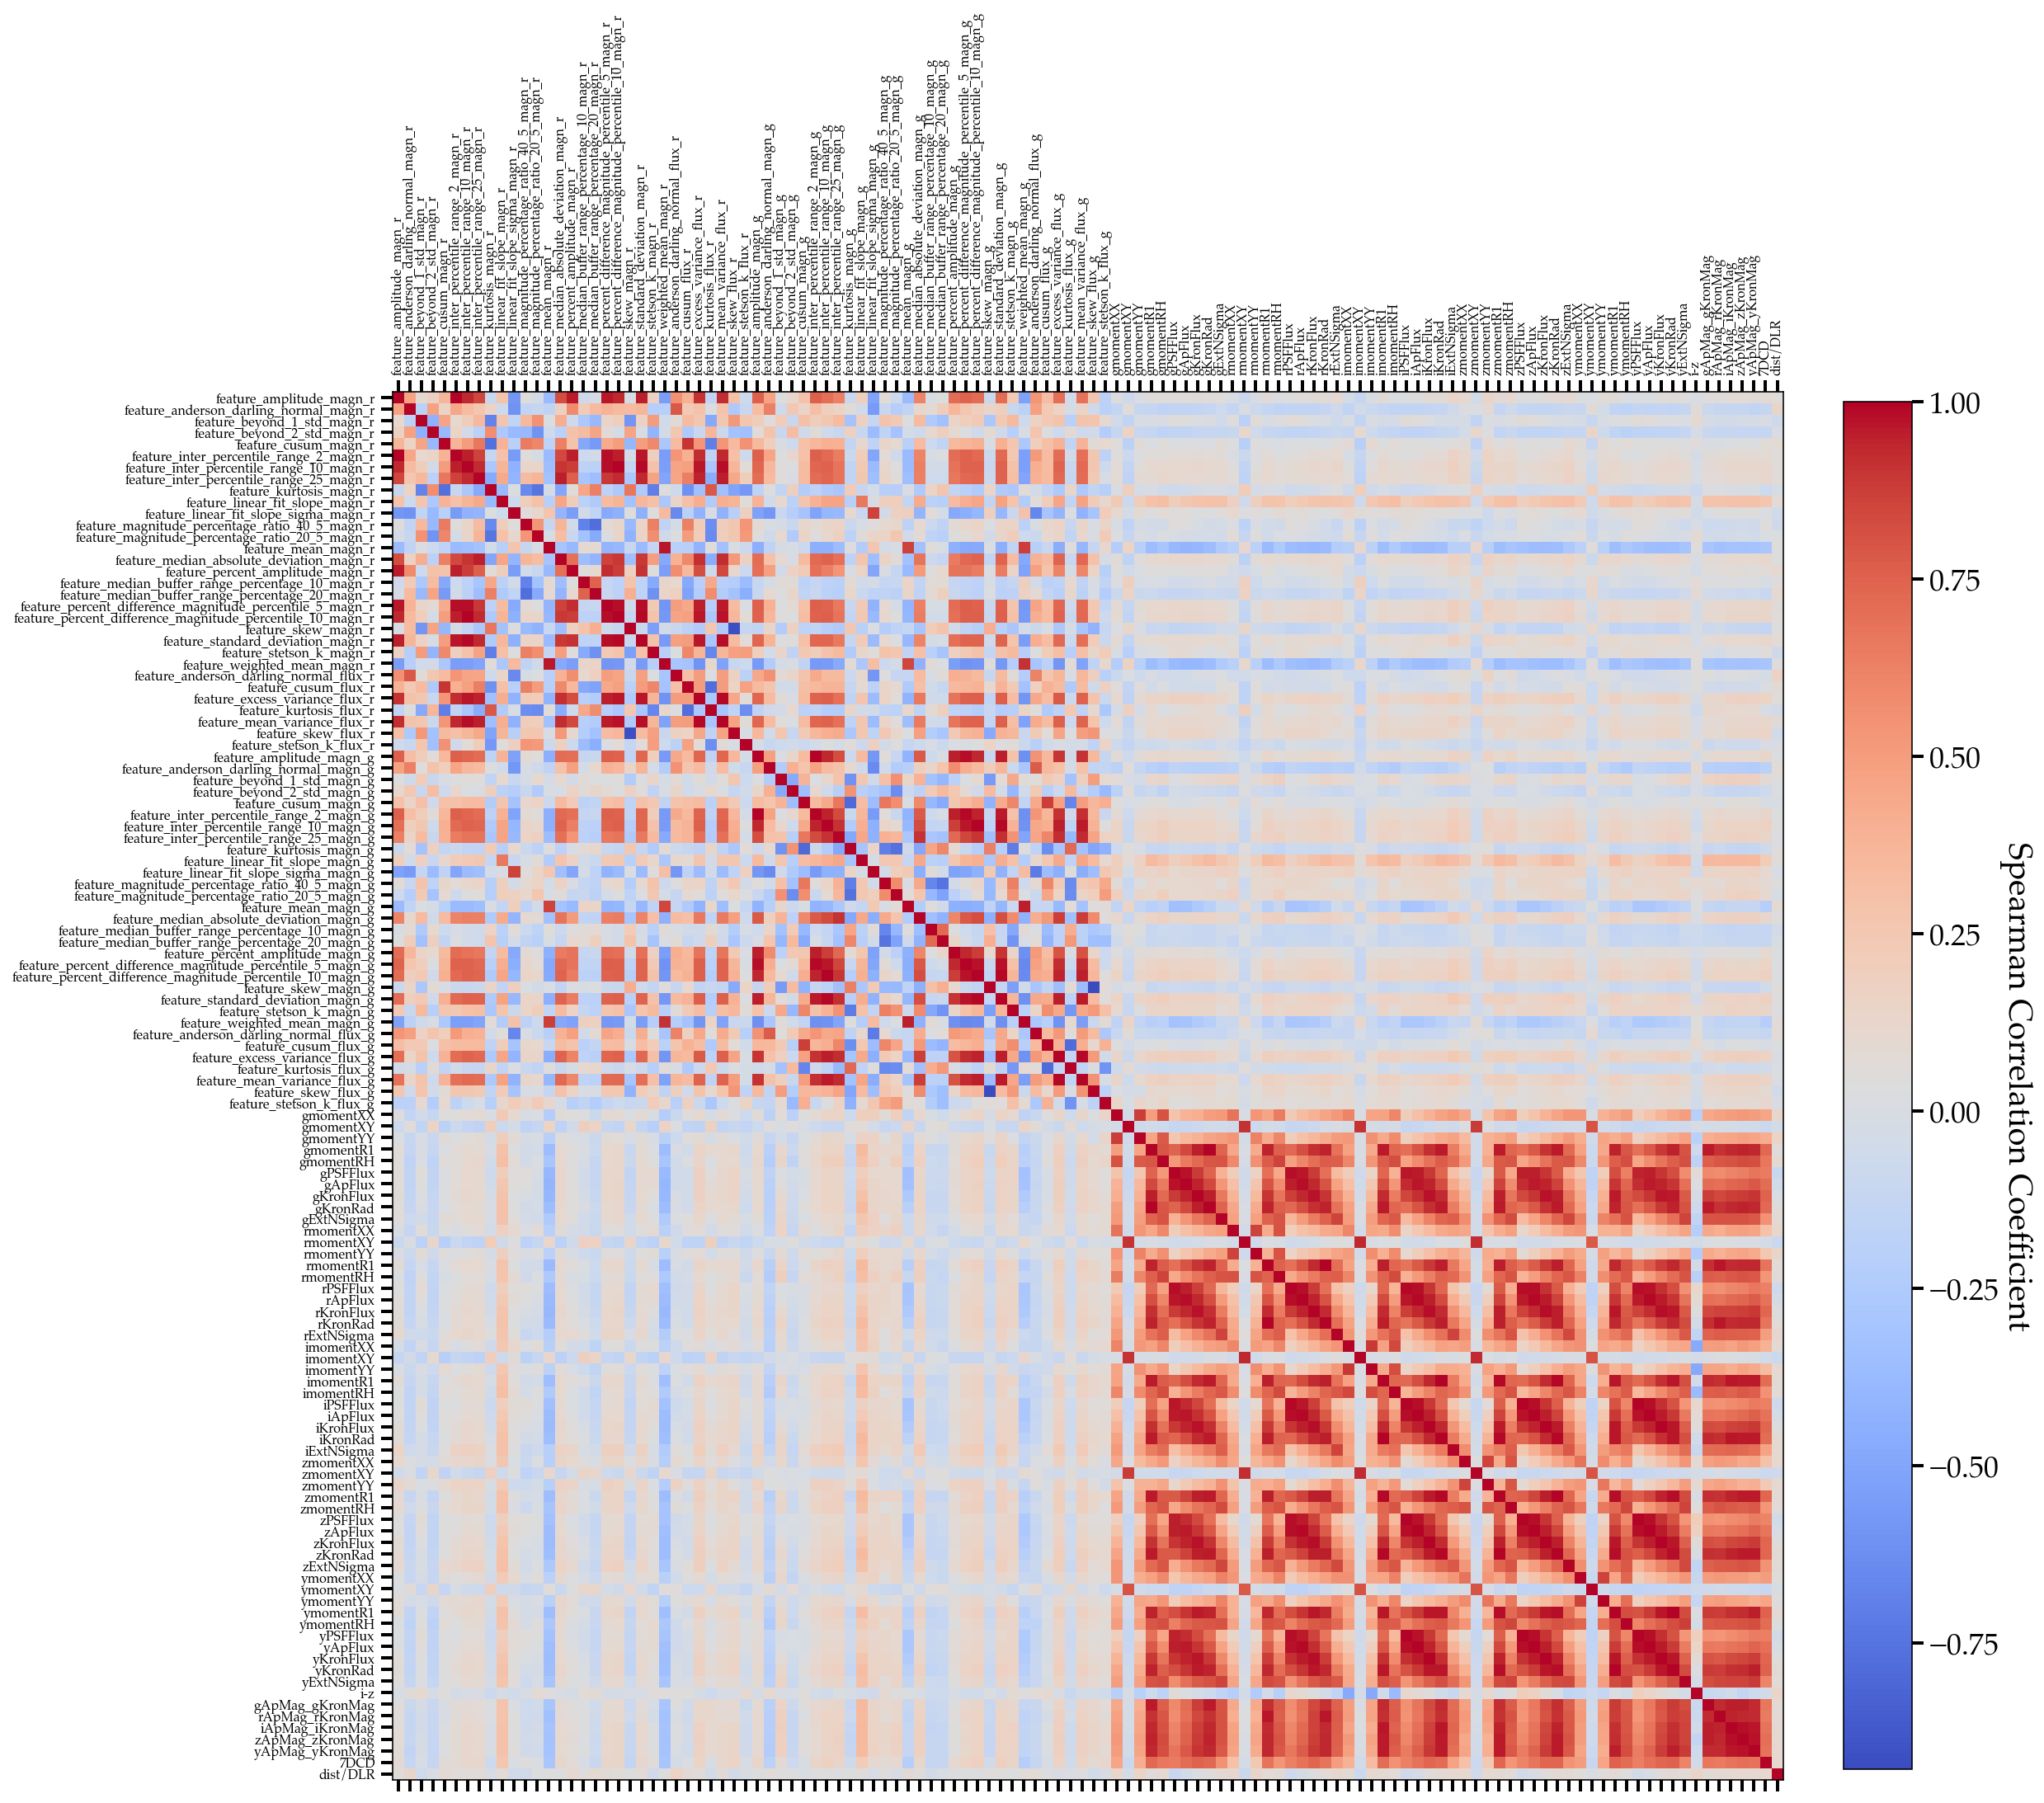

In [16]:
correlation_matrix = dataset_bank_tns_df.corr(method='spearman', )

fig, ax = plt.subplots(figsize=(17, 15))

cax = ax.matshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add colorbar
cbar = plt.colorbar(cax, fraction=0.045, pad=0.04)
cbar.set_label('Spearman Correlation Coefficient', rotation=270, labelpad=20)

# Display feature names on both axes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, fontsize=8)
ax.set_yticklabels(correlation_matrix.columns, fontsize=8)

plt.tight_layout(pad=0.02)

# Save or show the plot
plt.savefig(f'../figures/correlation/dataset_bank_tns_df_{smote_suffix}_correlation_matrix.pdf', 
            dpi=300, bbox_inches='tight', pad_inches=0.02)
plt.show()